In [2]:
import anndata
import pandas as pd

import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition

In [2]:
adata=anndata.read_h5ad('/home/jing/Desktop/scvi_gbm.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 55936 × 33694
    obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'Gene', 'mt', 'n_cells_by_counts-GSM5319506_', 'mean_counts-GSM5319506_', 'pct_dropout_by_counts-GSM5319506_', 'total_counts-GSM5319506_', 'n_cells_by_counts-GSM5319511_', 'mean_counts-GSM5319511_', 'pct_dropout_by_counts-GSM5319511_', 'total_counts-GSM5319511_', 'n_cells_by_counts-GSM5319518_', 'mean_counts-GSM5319518_', 'pct_dropout_by_counts-GSM5319518_', 'total_counts-GSM5319518_', 'n_cells_by_counts-GSM5319519_', 'mean_counts-GSM5319519_', 'pct_dropout_by_counts-GSM5319519_', 'total_counts-GSM5319519_', 'n_cells_by_counts-GSM5319520_', 'mean_counts-GSM5319520_', 'pct_dropout_by_counts-GSM5319520_', 'total_counts-GSM5319520_', 'n_cells_by_counts-GSM5319521_', 'mean_counts-GSM5319521_', 'pct_dropout_by_counts-GSM5319521_', 'total_counts-GSM5319521_', 'n_cells_by_counts-GSM5

In [4]:
gbm_scvi_normalized=pd.DataFrame(adata.layers['scvi_normalized'],
                                index=adata.obs.index+'_'+adata.obs['CellID'].astype(str),
                                columns=adata.var.index)

In [5]:
gbm_scvi_normalized

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
0-GSM5319518__AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,0.062636,...,0.002415,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273
1-GSM5319518__AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,0.022726,...,0.013972,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105
2-GSM5319518__AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,0.034750,...,0.012543,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362
3-GSM5319518__AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,0.082314,...,0.002542,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475
4-GSM5319518__AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,0.120149,...,0.002077,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452-GSM5319532__TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,0.123804,...,0.001733,0.000714,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296
3453-GSM5319532__TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,0.174996,...,0.001754,0.000912,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296
3454-GSM5319532__TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,0.146260,...,0.005212,0.000664,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494
3455-GSM5319532__TTTGTTGTCCATTGGA-1,0.000234,0.000122,0.000241,0.056379,0.000239,0.002565,0.001484,0.000141,0.814275,0.144898,...,0.000254,0.000193,0.089519,0.000151,0.004577,0.000290,0.000158,0.063886,0.000116,0.000172


In [6]:
gbm_scvi_normalized.reset_index(inplace=True)

In [7]:
gbm_scvi_normalized

Gene,index,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
0,0-GSM5319518__AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,...,0.002415,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273
1,1-GSM5319518__AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,...,0.013972,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105
2,2-GSM5319518__AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,...,0.012543,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362
3,3-GSM5319518__AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,...,0.002542,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475
4,4-GSM5319518__AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,...,0.002077,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,3452-GSM5319532__TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,...,0.001733,0.000714,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296
55932,3453-GSM5319532__TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,...,0.001754,0.000912,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296
55933,3454-GSM5319532__TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,...,0.005212,0.000664,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494
55934,3455-GSM5319532__TTTGTTGTCCATTGGA-1,0.000234,0.000122,0.000241,0.056379,0.000239,0.002565,0.001484,0.000141,0.814275,...,0.000254,0.000193,0.089519,0.000151,0.004577,0.000290,0.000158,0.063886,0.000116,0.000172


In [8]:
gbm_scvi_normalized[['Source','Barcodes']]=gbm_scvi_normalized['index'].str.split('__',expand=True)

In [9]:
gbm_scvi_normalized[['index_num','Source']]=gbm_scvi_normalized['Source'].str.split('-',expand=True)

In [10]:
gbm_scvi_normalized

Gene,index,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,...,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Source,Barcodes,index_num
0,0-GSM5319518__AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,...,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273,GSM5319518,AAACCCAAGGGATCAC-1,0
1,1-GSM5319518__AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,...,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105,GSM5319518,AAACCCAGTCGATTTG-1,1
2,2-GSM5319518__AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,...,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362,GSM5319518,AAACCCAGTCGTCAGC-1,2
3,3-GSM5319518__AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,...,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475,GSM5319518,AAACCCAGTTGTAAAG-1,3
4,4-GSM5319518__AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,...,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730,GSM5319518,AAACCCATCTATCGGA-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,3452-GSM5319532__TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,...,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296,GSM5319532,TTTGGTTTCATTATCC-1,3452
55932,3453-GSM5319532__TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,...,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296,GSM5319532,TTTGGTTTCCCTCGTA-1,3453
55933,3454-GSM5319532__TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,...,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494,GSM5319532,TTTGTTGTCAGACAAA-1,3454
55934,3455-GSM5319532__TTTGTTGTCCATTGGA-1,0.000234,0.000122,0.000241,0.056379,0.000239,0.002565,0.001484,0.000141,0.814275,...,0.000151,0.004577,0.000290,0.000158,0.063886,0.000116,0.000172,GSM5319532,TTTGTTGTCCATTGGA-1,3455


In [11]:
gbm_scvi_normalized.drop(columns=['index','index_num'],inplace=True)

In [12]:
gbm_scvi_normalized

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Source,Barcodes
0,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,0.062636,...,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273,GSM5319518,AAACCCAAGGGATCAC-1
1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,0.022726,...,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105,GSM5319518,AAACCCAGTCGATTTG-1
2,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,0.034750,...,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362,GSM5319518,AAACCCAGTCGTCAGC-1
3,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,0.082314,...,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475,GSM5319518,AAACCCAGTTGTAAAG-1
4,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,0.120149,...,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730,GSM5319518,AAACCCATCTATCGGA-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,0.123804,...,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296,GSM5319532,TTTGGTTTCATTATCC-1
55932,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,0.174996,...,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296,GSM5319532,TTTGGTTTCCCTCGTA-1
55933,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,0.146260,...,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494,GSM5319532,TTTGTTGTCAGACAAA-1
55934,0.000234,0.000122,0.000241,0.056379,0.000239,0.002565,0.001484,0.000141,0.814275,0.144898,...,0.089519,0.000151,0.004577,0.000290,0.000158,0.063886,0.000116,0.000172,GSM5319532,TTTGTTGTCCATTGGA-1


In [13]:
gbm_scvi_normalized['index_clean']=gbm_scvi_normalized['Source']+'_'+gbm_scvi_normalized['Barcodes']

In [14]:
gbm_scvi_normalized.set_index('index_clean',inplace=True)

In [15]:
gbm_scvi_normalized

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B,Source,Barcodes
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,0.062636,...,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273,GSM5319518,AAACCCAAGGGATCAC-1
GSM5319518_AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,0.022726,...,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105,GSM5319518,AAACCCAGTCGATTTG-1
GSM5319518_AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,0.034750,...,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362,GSM5319518,AAACCCAGTCGTCAGC-1
GSM5319518_AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,0.082314,...,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475,GSM5319518,AAACCCAGTTGTAAAG-1
GSM5319518_AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,0.120149,...,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730,GSM5319518,AAACCCATCTATCGGA-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,0.123804,...,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296,GSM5319532,TTTGGTTTCATTATCC-1
GSM5319532_TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,0.174996,...,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296,GSM5319532,TTTGGTTTCCCTCGTA-1
GSM5319532_TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,0.146260,...,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494,GSM5319532,TTTGTTGTCAGACAAA-1


In [16]:
gbm_scvi_normalized_SVM=gbm_scvi_normalized.drop(columns=['Source','Barcodes'])

In [17]:
gbm_scvi_normalized_SVM

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,0.062636,...,0.002415,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273
GSM5319518_AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,0.022726,...,0.013972,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105
GSM5319518_AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,0.034750,...,0.012543,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362
GSM5319518_AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,0.082314,...,0.002542,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475
GSM5319518_AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,0.120149,...,0.002077,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,0.123804,...,0.001733,0.000714,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296
GSM5319532_TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,0.174996,...,0.001754,0.000912,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296
GSM5319532_TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,0.146260,...,0.005212,0.000664,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494


In [18]:
#['GSM5319518_SF2777','GSM5319519_SF2990','GSM5319520_SF3076','GSM5319521_SF3391','GSM5319511_SF11916',
#GSM5319506_SF11082','GSM5319530_SF9358','GSM5319559_SF9798',]


gbm_primary=gbm_scvi_normalized[(gbm_scvi_normalized['Source']=='GSM5319518')|(gbm_scvi_normalized['Source']=='GSM5319519')|
(gbm_scvi_normalized['Source']=='GSM5319520')|(gbm_scvi_normalized['Source']=='GSM5319521')|(gbm_scvi_normalized['Source']=='GSM5319511')|
(gbm_scvi_normalized['Source']=='GSM5319506')|(gbm_scvi_normalized['Source']=='GSM5319530')|(gbm_scvi_normalized['Source']=='GSM5319559')]

In [19]:
gbm_primary_df =gbm_primary.drop(columns=['Source','Barcodes'])

In [20]:
gbm_primary_df

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,0.000632,0.000236,0.000297,0.032377,0.000275,0.010784,0.000392,0.001651,2.220311,0.062636,...,0.002415,0.000420,0.081659,0.000205,0.004258,0.000270,0.000617,0.287315,0.000371,0.000273
GSM5319518_AAACCCAGTCGATTTG-1,0.000467,0.000053,0.000123,0.006632,0.000155,0.000853,0.000102,0.000642,1.251702,0.022726,...,0.013972,0.000143,0.032344,0.000066,0.005308,0.000071,0.000128,0.122936,0.000182,0.000105
GSM5319518_AAACCCAGTCGTCAGC-1,0.000650,0.000179,0.000256,0.009073,0.000420,0.004109,0.000421,0.001072,1.503267,0.034750,...,0.012543,0.000427,0.057075,0.000152,0.004094,0.000216,0.000431,0.138962,0.000352,0.000362
GSM5319518_AAACCCAGTTGTAAAG-1,0.000871,0.000343,0.000509,0.030528,0.000391,0.009959,0.000714,0.001784,2.562191,0.082314,...,0.002542,0.000533,0.042709,0.000215,0.002956,0.000425,0.000716,0.140575,0.000533,0.000475
GSM5319518_AAACCCATCTATCGGA-1,0.001036,0.000478,0.000913,0.032109,0.000561,0.011951,0.001298,0.002064,2.979676,0.120149,...,0.002077,0.000823,0.038750,0.000260,0.004652,0.000608,0.001016,0.111696,0.000916,0.000730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5319559_TTTGGTTGTTGCCGAC-1,0.011772,0.001379,0.002151,0.055405,0.001624,0.000960,0.001734,0.003700,2.511834,0.172843,...,0.060131,0.002962,0.221142,0.001118,0.026460,0.001831,0.001478,0.106801,0.002126,0.001464
GSM5319559_TTTGGTTTCTGCATGA-1,0.004221,0.001229,0.001328,0.102611,0.001162,0.001690,0.000890,0.002611,3.699159,0.249486,...,0.010024,0.002468,0.341711,0.000817,0.020503,0.001673,0.002200,0.251644,0.001197,0.001024
GSM5319559_TTTGGTTTCTGTCCGT-1,0.005543,0.000859,0.001043,0.071865,0.001018,0.001552,0.000861,0.001949,3.118242,0.192017,...,0.009977,0.002032,0.238845,0.000840,0.015658,0.001244,0.001627,0.165016,0.000863,0.000744


In [138]:
gbm_primary_df.to_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_primary_df.pkl')

In [21]:
#['GSM5319548_SF2979','GSM5319549_SF3073','GSM5319550_SF3243','GSM5319551_SF3448','GSM5319543_SF12382',
#'GSM5319562_SF11488',GSM5319568_SF9962','GSM5319532_SF9494']
gbm_recurrent=gbm_scvi_normalized[(gbm_scvi_normalized['Source']=='GSM5319548')|(gbm_scvi_normalized['Source']=='GSM5319549')|
(gbm_scvi_normalized['Source']=='GSM5319550')|(gbm_scvi_normalized['Source']=='GSM5319551')|(gbm_scvi_normalized['Source']=='GSM5319543')|
(gbm_scvi_normalized['Source']=='GSM5319562')|(gbm_scvi_normalized['Source']=='GSM5319568')|(gbm_scvi_normalized['Source']=='GSM5319532')]

In [22]:
gbm_recurrent_df =gbm_recurrent.drop(columns=['Source','Barcodes'])

In [23]:
gbm_recurrent_df

Gene,RP11-34P13.3,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,RP11-34P13.14,RP11-34P13.9,FO538757.3,FO538757.2,AP006222.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231B
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5319548_AAACCCAAGATCCGAG-1,0.000258,0.000202,0.000310,0.011044,0.000349,0.003671,0.002316,0.000870,0.867930,0.050453,...,0.000068,0.000430,0.063102,0.000100,0.001016,0.000266,0.000176,0.101162,0.000110,0.000215
GSM5319548_AAACCCACAAGAGGCT-1,0.001209,0.000453,0.000535,0.005697,0.000440,0.000224,0.000422,0.007191,1.019019,0.085742,...,0.003502,0.000222,0.191374,0.000286,0.001546,0.000556,0.000574,0.121346,0.000338,0.000346
GSM5319548_AAACCCACATTGAGGG-1,0.002811,0.000344,0.000688,0.004631,0.000344,0.000464,0.000376,0.002343,1.026481,0.050837,...,0.000648,0.000369,0.182391,0.000214,0.003473,0.000428,0.000488,0.116505,0.000325,0.000393
GSM5319548_AAACGAAAGCAGTAAT-1,0.001072,0.000360,0.000462,0.007534,0.000441,0.000430,0.000347,0.010429,1.049155,0.076686,...,0.003126,0.000323,0.179999,0.000264,0.001125,0.000489,0.000586,0.172144,0.000263,0.000332
GSM5319548_AAACGAATCGCTTACC-1,0.001030,0.000449,0.000321,0.007496,0.000332,0.000410,0.000473,0.001536,0.757773,0.063088,...,0.004285,0.001690,0.069119,0.000175,0.000572,0.000348,0.000302,0.169771,0.000192,0.000347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.000450,0.000340,0.000236,0.021646,0.000220,0.000476,0.000245,0.000230,0.669638,0.123804,...,0.001733,0.000714,0.129264,0.000173,0.004646,0.000380,0.000227,0.091329,0.000168,0.000296
GSM5319532_TTTGGTTTCCCTCGTA-1,0.000250,0.000305,0.000271,0.022430,0.000287,0.000975,0.000321,0.000452,0.612750,0.174996,...,0.001754,0.000912,0.088508,0.000234,0.003474,0.000266,0.000266,0.039893,0.000191,0.000296
GSM5319532_TTTGTTGTCAGACAAA-1,0.001693,0.000419,0.000716,0.013257,0.000773,0.002920,0.000484,0.001709,0.818089,0.146260,...,0.005212,0.000664,0.052437,0.000753,0.013969,0.001005,0.000766,0.073900,0.000712,0.000494


In [3]:
gbm_recurrent_df.to_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_recurrent_df.pkl')

NameError: name 'gbm_recurrent_df' is not defined

In [ ]:
#Kernel dies 

cst = CellStateTransition('pmr_rct', gbm_primary_df, gbm_recurrent_df)

dpd_scores = cst.get_dpd()

In [25]:
lm_df=pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_Scripts/perturbations/01_outputs_2020/L1000_Data_norm_data.csv',index_col=0)
display(lm_df)

,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B12,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,...,MOAR010_BC3C_24H:K09,MOAR010_BC3C_24H:L19,MOAR010_BC3C_24H:L20,MOAR010_BC3C_24H:L21,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:J10
AARS,-0.496854,0.288446,0.189747,-0.016454,0.080746,0.282346,0.326246,0.244946,0.303046,0.387546,...,-0.217618,-0.074268,-0.012317,-0.004018,0.215100,-0.178100,-0.007000,0.024000,0.007400,0.031399
ABCB6,-0.658596,-0.142196,-0.075397,-0.383796,-0.199996,-0.074197,0.108804,0.055204,-0.399196,-0.227496,...,0.202852,-0.003798,-0.661323,0.326502,0.127850,0.081150,-0.026850,-0.152851,0.122550,-0.029350
ABCC5,-0.080204,0.231996,-0.329354,-0.225204,0.278446,0.034696,0.396596,0.288746,-0.255704,-0.254154,...,0.011493,0.187043,-0.051357,0.358943,0.197500,0.119350,0.212450,-0.177250,0.138650,0.568950
ABCF1,0.202535,0.602335,0.403335,0.313134,-0.083265,-0.056365,-0.387216,0.104534,0.097235,0.540634,...,-0.458439,1.132361,-0.555990,-0.556689,-0.036825,-0.080325,0.059175,0.307175,0.580075,0.322875
ABCF3,-0.520919,-0.192819,0.001032,-0.096419,0.210881,-0.731118,0.095381,0.049931,0.313481,-0.078018,...,0.201432,-0.028568,0.447982,0.610582,-0.378251,0.003950,0.127300,-0.197401,-0.128351,-0.012850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF395,1.796254,1.773154,0.668354,0.825354,0.350654,0.205954,-0.998346,-0.458247,0.235354,0.230653,...,-0.285181,-1.188080,-0.050680,-1.175880,0.300250,-0.265350,-0.380850,-0.330950,-1.844650,-0.612350
ZNF451,-0.244519,0.116732,0.058081,-0.178169,-0.080619,-0.139119,0.064681,-0.237719,-0.083019,-0.272119,...,0.085807,0.107632,-0.083718,0.105732,-0.324500,0.080550,-0.114950,-0.337650,-0.024950,-0.151550
ZNF586,0.097627,0.061027,-0.337573,0.098427,-0.338173,0.017627,-0.197423,-0.155173,-0.078473,-0.300473,...,0.056085,-0.005365,-0.123664,-0.191564,-0.304650,-0.259400,0.163600,-0.428700,-0.069200,0.073700
ZNF589,0.608573,0.106123,-0.014126,-0.003677,-0.123477,-0.243377,0.044623,0.092123,-0.021477,0.201823,...,-0.200241,-0.027441,0.007359,-0.072891,-0.315500,-0.013900,-0.035050,1.836400,-0.223300,-0.343400


In [26]:
lm_df.index

Index(['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1',
       'ACAA1', 'ACAT2',
       ...
       'ZMIZ1', 'ZMYM2', 'ZNF131', 'ZNF274', 'ZNF318', 'ZNF395', 'ZNF451',
       'ZNF586', 'ZNF589', 'ZW10'],
      dtype='object', length=978)

In [32]:
common_genes=gbm_primary_df.columns.intersection(lm_df.index)

In [33]:
gbm_primary_df_lm =gbm_primary_df[common_genes]

In [34]:
gbm_recurrent_df_lm=gbm_recurrent[common_genes]

In [35]:
#Kernel dies 

cst = CellStateTransition('pmr_rct', gbm_primary_df_lm, gbm_recurrent_df_lm)

dpd_scores = cst.get_dpd()

In [4]:
dpd_scores_high_dim = pd.read_pickle('/home/jing/Phd_project/project_GBM/gbm_OUTPUT/dpd_pmr_rct.pkl')

In [36]:
norm_s_df = pd.DataFrame(np.stack([cst.n, cst.s], axis=1), index=cst.svm_input.data.columns, columns=["n", "s"])

In [52]:
cst.h

0.012865815896536329

In [ ]:
DPD_all.loc[DPD_all['Type'].isin(["GSM5288671", "GSM5288670"]), 'Description'] = "MIBC"


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, data_all_cells, DPD_all['Description'], cv = k_folds)
print("Cross Validation Scores: ", np.round(scores,2))
print("Average CV Score: ", np.round(scores.mean(),2))



In [37]:
dpd_scores

,DPD_pmr_rct
index_clean,
GSM5319518_AAACCCAAGGGATCAC-1,-0.984747
GSM5319518_AAACCCAGTCGATTTG-1,-0.651900
GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357
GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237
GSM5319518_AAACCCATCTATCGGA-1,-1.263683
...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.413427
GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598
GSM5319532_TTTGTTGTCAGACAAA-1,0.871927


In [39]:
dpd_scores.reset_index(inplace=True)
dpd_scores[['Source','Barcodes']]=dpd_scores['index_clean'].str.split('_',expand=True)

In [40]:
dpd_scores

,index_clean,DPD_pmr_rct,Source,Barcodes
0,GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1
1,GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1
2,GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1
3,GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1
4,GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1
...,...,...,...,...
55931,GSM5319532_TTTGGTTTCATTATCC-1,0.413427,GSM5319532,TTTGGTTTCATTATCC-1
55932,GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598,GSM5319532,TTTGGTTTCCCTCGTA-1
55933,GSM5319532_TTTGTTGTCAGACAAA-1,0.871927,GSM5319532,TTTGTTGTCAGACAAA-1
55934,GSM5319532_TTTGTTGTCCATTGGA-1,0.758132,GSM5319532,TTTGTTGTCCATTGGA-1


In [41]:
dpd_scores['zeros']=0

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
dpd_scores[dpd_scores['Source']=='GSM5319518']

,index_clean,DPD_pmr_rct,Source,Barcodes,zeros
0,GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1,0
1,GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1,0
2,GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1,0
3,GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1,0
4,GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1,0
...,...,...,...,...,...
4178,GSM5319518_TTTGTTGAGTACCATC-1,-1.024350,GSM5319518,TTTGTTGAGTACCATC-1,0
4179,GSM5319518_TTTGTTGCACTGGCCA-1,-0.652184,GSM5319518,TTTGTTGCACTGGCCA-1,0
4180,GSM5319518_TTTGTTGGTACTCAAC-1,-1.159284,GSM5319518,TTTGTTGGTACTCAAC-1,0
4181,GSM5319518_TTTGTTGTCCCAAGTA-1,-1.625491,GSM5319518,TTTGTTGTCCCAAGTA-1,0


<Axes: xlabel='zeros', ylabel='DPD_pmr_rct'>

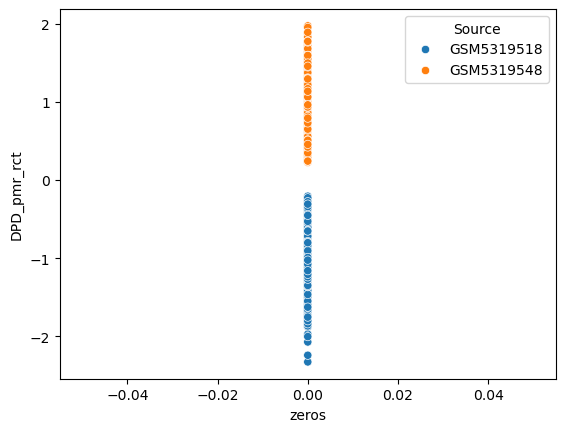

In [51]:
dpd_scores_pair=dpd_scores[(dpd_scores['Source']=='GSM5319518')|(dpd_scores['Source']=='GSM5319548')]
sns.scatterplot(x='zeros',y='DPD_pmr_rct',data=dpd_scores_pair,hue='Source')

In [ ]:
#Metadata normal-tumor

In [103]:
metadata=pd.read_csv('/home/jing/Phd_project/project_GBM/gbm_DATA/gbm_DATA_metadata/GSE174554_Tumor_normal_metadata.txt',sep=' ')
display(metadata)

,Sample,Barcode,Tumor_Normal_annotation
0,SF10022,CTATCTAAGCAAGCCA,Tumor
1,SF10022,AAACCCAGTCTACGAT,Normal
2,SF10022,AAAGGGCTCACCCTGT,Normal
3,SF10022,AACAACCAGACCCGCT,Normal
4,SF10022,AACAAGAGTGTAAACA,Normal
...,...,...,...
254283,SF9791v2,TTTCAGTCATCTTCGC,Tumor
254284,SF9791v2,TTTCGATAGTCATAGA,Tumor
254285,SF9791v2,TTTGGAGCACTGTCGG,Tumor
254286,SF9791v2,TTTGGAGTCACGTCCT,Tumor


In [104]:
metadata['Barcodes']=metadata['Barcode']+'-1'

In [64]:
dpd_scores

,index_clean,DPD_pmr_rct,Source,Barcodes,zeros
0,GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1,0
1,GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1,0
2,GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1,0
3,GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1,0
4,GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1,0
...,...,...,...,...,...
55931,GSM5319532_TTTGGTTTCATTATCC-1,0.413427,GSM5319532,TTTGGTTTCATTATCC-1,0
55932,GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598,GSM5319532,TTTGGTTTCCCTCGTA-1,0
55933,GSM5319532_TTTGTTGTCAGACAAA-1,0.871927,GSM5319532,TTTGTTGTCAGACAAA-1,0
55934,GSM5319532_TTTGTTGTCCATTGGA-1,0.758132,GSM5319532,TTTGTTGTCCATTGGA-1,0


In [ ]:
#['GSM5319518_SF2777','GSM5319519_SF2990','GSM5319520_SF3076','GSM5319521_SF3391','GSM5319511_SF11916',
#GSM5319506_SF11082','GSM5319530_SF9358','GSM5319559_SF9798',]
#['GSM5319548_SF2979','GSM5319549_SF3073','GSM5319550_SF3243','GSM5319551_SF3448','GSM5319543_SF12382',
#'GSM5319562_SF11488',GSM5319568_SF9962','GSM5319532_SF9494']

In [95]:
for i in dpd_scores.index:
    if dpd_scores.loc[i,'Source']=='GSM5319532':
        dpd_scores.loc[i,'Patients_id']='SF9494'

In [74]:
dpd_scores[dpd_scores.Source.str.contains('GSM5319518')],'Patients_id']='SF2777'

/tmp/ipykernel_186703/3069110741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpd_scores[dpd_scores.Source.str.contains('GSM5319518')]['Patients_id']='SF2777'


In [71]:
dpd_scores.drop(columns='zeros',inplace=True)

In [98]:
dpd_scores

,index_clean,DPD_pmr_rct,Source,Barcodes,Patients_id
0,GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1,SF2777
1,GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1,SF2777
2,GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1,SF2777
3,GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1,SF2777
4,GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1,SF2777
...,...,...,...,...,...
55931,GSM5319532_TTTGGTTTCATTATCC-1,0.413427,GSM5319532,TTTGGTTTCATTATCC-1,SF9494
55932,GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598,GSM5319532,TTTGGTTTCCCTCGTA-1,SF9494
55933,GSM5319532_TTTGTTGTCAGACAAA-1,0.871927,GSM5319532,TTTGTTGTCAGACAAA-1,SF9494
55934,GSM5319532_TTTGTTGTCCATTGGA-1,0.758132,GSM5319532,TTTGTTGTCCATTGGA-1,SF9494


In [112]:
dpd_scores_final=dpd_scores.merge(metadata[['Sample','Tumor_Normal_annotation','Barcodes']],left_on=['Patients_id','Barcodes'],right_on=['Sample','Barcodes'],how='left')

In [115]:
dpd_scores_final.set_index('index_clean',inplace=True)

In [116]:
dpd_scores_final

,DPD_pmr_rct,Source,Barcodes,Patients_id,Sample,Tumor_Normal_annotation
index_clean,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1,SF2777,SF2777,Tumor
...,...,...,...,...,...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.413427,GSM5319532,TTTGGTTTCATTATCC-1,SF9494,SF9494,Normal
GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598,GSM5319532,TTTGGTTTCCCTCGTA-1,SF9494,SF9494,Normal
GSM5319532_TTTGTTGTCAGACAAA-1,0.871927,GSM5319532,TTTGTTGTCAGACAAA-1,SF9494,SF9494,Tumor


In [118]:
dpd_scores_final.to_pickle('/home/jing/Desktop/gbm_dpd_scores_final.pkl')

In [117]:
dpd_scores_final[dpd_scores_final['Tumor_Normal_annotation']=='Tumor']

,DPD_pmr_rct,Source,Barcodes,Patients_id,Sample,Tumor_Normal_annotation
index_clean,,,,,,
GSM5319518_AAACCCAAGGGATCAC-1,-0.984747,GSM5319518,AAACCCAAGGGATCAC-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTCGATTTG-1,-0.651900,GSM5319518,AAACCCAGTCGATTTG-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTCGTCAGC-1,-0.776357,GSM5319518,AAACCCAGTCGTCAGC-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCAGTTGTAAAG-1,-1.487237,GSM5319518,AAACCCAGTTGTAAAG-1,SF2777,SF2777,Tumor
GSM5319518_AAACCCATCTATCGGA-1,-1.263683,GSM5319518,AAACCCATCTATCGGA-1,SF2777,SF2777,Tumor
...,...,...,...,...,...,...
GSM5319532_TTTCGATCACTCTGCT-1,0.838544,GSM5319532,TTTCGATCACTCTGCT-1,SF9494,SF9494,Tumor
GSM5319532_TTTCGATGTGTCCTAA-1,0.459240,GSM5319532,TTTCGATGTGTCCTAA-1,SF9494,SF9494,Tumor
GSM5319532_TTTGACTGTTATGTGC-1,0.484030,GSM5319532,TTTGACTGTTATGTGC-1,SF9494,SF9494,Tumor


In [119]:
dpd_scores_final['zeros']=0

<Axes: xlabel='zeros', ylabel='DPD_pmr_rct'>

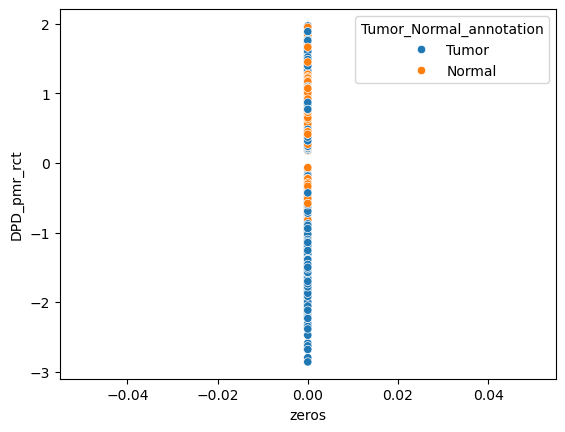

In [120]:
sns.scatterplot(x='zeros',y='DPD_pmr_rct',data=dpd_scores_final,hue='Tumor_Normal_annotation')

In [135]:
sub_df=dpd_scores_final[dpd_scores_final['DPD_pmr_rct']<0]

In [137]:
sub_df['Tumor_Normal_annotation'].value_counts()

Tumor_Normal_annotation
Tumor     21894
Normal     5296
Name: count, dtype: int64

In [121]:
dpd_scores_final[dpd_scores_final['DPD_pmr_rct']>0]

,DPD_pmr_rct,Source,Barcodes,Patients_id,Sample,Tumor_Normal_annotation,zeros
index_clean,,,,,,,
GSM5319548_AAACCCAAGATCCGAG-1,0.978074,GSM5319548,AAACCCAAGATCCGAG-1,SF2979,SF2979,Normal,0
GSM5319548_AAACCCACAAGAGGCT-1,1.141659,GSM5319548,AAACCCACAAGAGGCT-1,SF2979,SF2979,Tumor,0
GSM5319548_AAACCCACATTGAGGG-1,0.729038,GSM5319548,AAACCCACATTGAGGG-1,SF2979,SF2979,Normal,0
GSM5319548_AAACGAAAGCAGTAAT-1,1.287196,GSM5319548,AAACGAAAGCAGTAAT-1,SF2979,SF2979,Tumor,0
GSM5319548_AAACGAATCGCTTACC-1,0.831880,GSM5319548,AAACGAATCGCTTACC-1,SF2979,SF2979,Normal,0
...,...,...,...,...,...,...,...
GSM5319532_TTTGGTTTCATTATCC-1,0.413427,GSM5319532,TTTGGTTTCATTATCC-1,SF9494,SF9494,Normal,0
GSM5319532_TTTGGTTTCCCTCGTA-1,0.727598,GSM5319532,TTTGGTTTCCCTCGTA-1,SF9494,SF9494,Normal,0
GSM5319532_TTTGTTGTCAGACAAA-1,0.871927,GSM5319532,TTTGTTGTCAGACAAA-1,SF9494,SF9494,Tumor,0


In [125]:
27414-17127

10287